In [19]:
import numpy as np
import keras as ks
import tensorflow.keras as tk
from keras import layers
import matplotlib.pyplot as plt

In [20]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [21]:
#create model
#3*3 matrix size
#uses maxpooling, 2*2 matrix
#flattens matrix
#sets dropout
#density set and uses softmax function 

In [22]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

Train the Model

In [28]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#get history of model, x and y values
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

Epoch 1/15
422/422 [==============================] - 11s 25ms/step - loss: 0.0203 - accuracy: 0.9928 - val_loss: 0.0289 - val_accuracy: 0.9920
Epoch 2/15
422/422 [==============================] - 10s 24ms/step - loss: 0.0206 - accuracy: 0.9929 - val_loss: 0.0291 - val_accuracy: 0.9932
Epoch 3/15
422/422 [==============================] - 10s 25ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0296 - val_accuracy: 0.9927
Epoch 4/15
422/422 [==============================] - 10s 25ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0305 - val_accuracy: 0.9925
Epoch 5/15
422/422 [==============================] - 10s 24ms/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0299 - val_accuracy: 0.9927
Epoch 6/15
422/422 [==============================] - 11s 25ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0279 - val_accuracy: 0.9938
Epoch 7/15
422/422 [==============================] - 10s 25ms/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0296 - val_accuracy:

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0207623690366745
Test accuracy: 0.9940000176429749


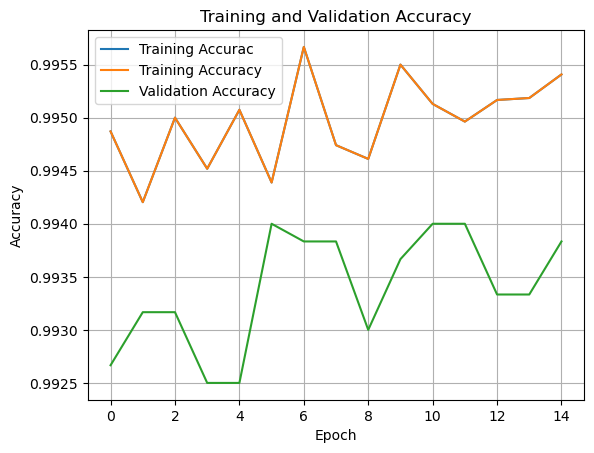

In [30]:
plt.plot(history.history['accuracy'], label='Training Accurac')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

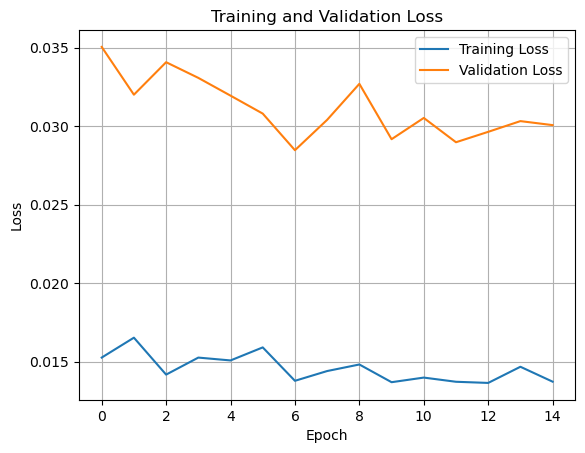

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()